# Description

This gallery notebook is used to verify that `amp/core/plotting` functions display plots correctly.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Imports

In [2]:
import logging

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import core.plotting.correlation as cplocorr
import core.plotting.misc_plotting as cplmiplo
import core.plotting.test.test_plots as cptetepl
import core.plotting.visual_stationarity_test as cpvistte

import dataflow.model.model_plotter as dtfmomoplo
import dataflow.model.test.test_model_evaluator as cdmttme

import helpers.hdbg as hdbg
import helpers.henv as henv
import helpers.hprint as hprint

<jemalloc>: MADV_DONTNEED does not work (memset will be used instead)
<jemalloc>: (This is the expected behaviour if you are running under QEMU)
/app/core/explore.py:39: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tauton


In [3]:
hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

INFO: > cmd='/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/.local/share/jupyter/runtime/kernel-8a7acd82-b137-480c-af4c-efb3c361374b.json'
-----------------------------------------------------------------------------
This code is not in sync with the container:
code_version='1.4.3' != container_version='1.4.0'
-----------------------------------------------------------------------------
You need to:
- merge origin/master into your branch with `invoke git_merge_master`
- pull the latest container with `invoke docker_pull`
INFO  # Git
  branch_name='SorrTask460_test_plot_rets_signal_analysis'
  hash='47bb4b8f7'
  # Last commits:
    * 47bb4b8f7 dchoi127 Update test_plots.py                                              (    3 days ago) Mon Jul 31 16:57:12 2023  (HEAD -> SorrTask460_test_plot_rets_signal_analysis, origin/SorrTask460_test_plot_rets_signal_analysis)
    * 54c2d0a30 dchoi127 Gallery notebook test_rets_signal_analysis                        (    3 days ago) M

# Plots

## `plot_histograms_and_lagged_scatterplot()`

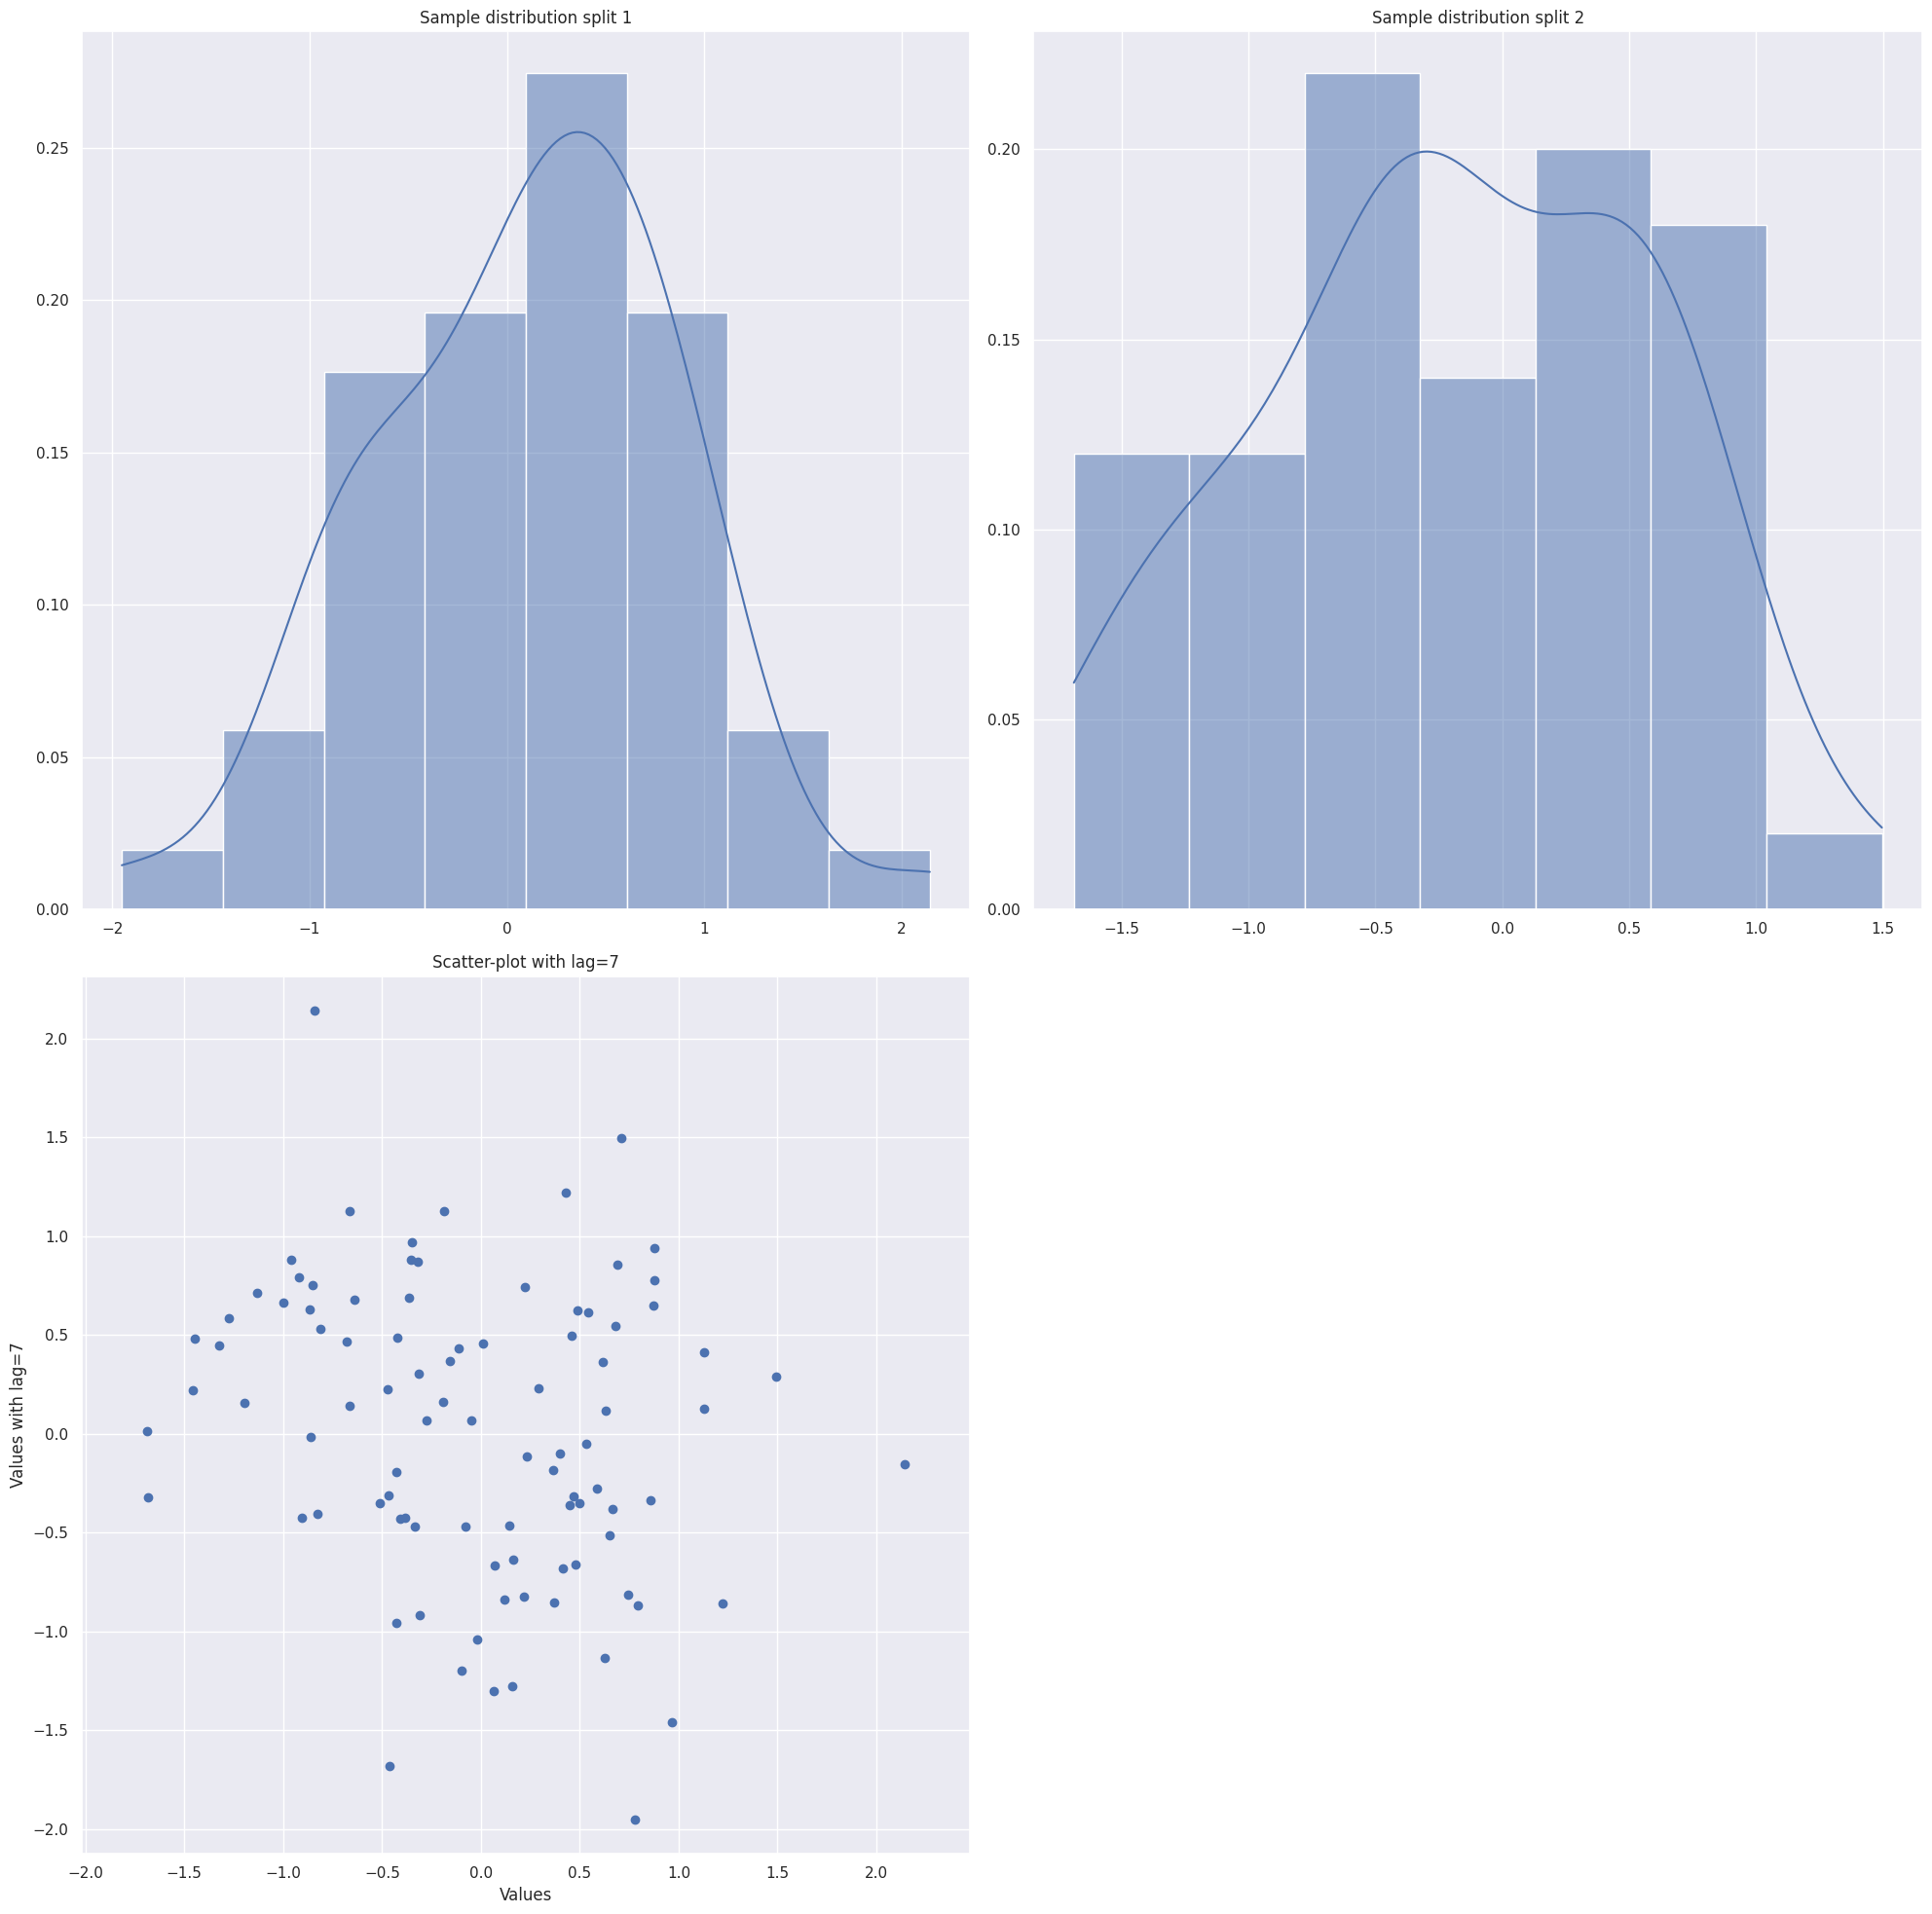

In [4]:
# Set inputs.
cptetepl.Test_plots.setUpClass()
rng = np.random.default_rng(seed=cptetepl.Test_plots._seed)
samples = rng.normal(size=100)
index = pd.date_range(start="2023-01-01", periods=len(samples), freq="D")
srs = pd.Series(samples, index=index)
lag = 7
# TODO(Dan): Remove after integration with `cmamp`. Changes from Cm #4722 are not in `sorrentum` yet.
figsize = (20, 20)
cpvistte.plot_histograms_and_lagged_scatterplot(srs, lag, figsize=figsize)

## `plot_timeseries_distribution()`

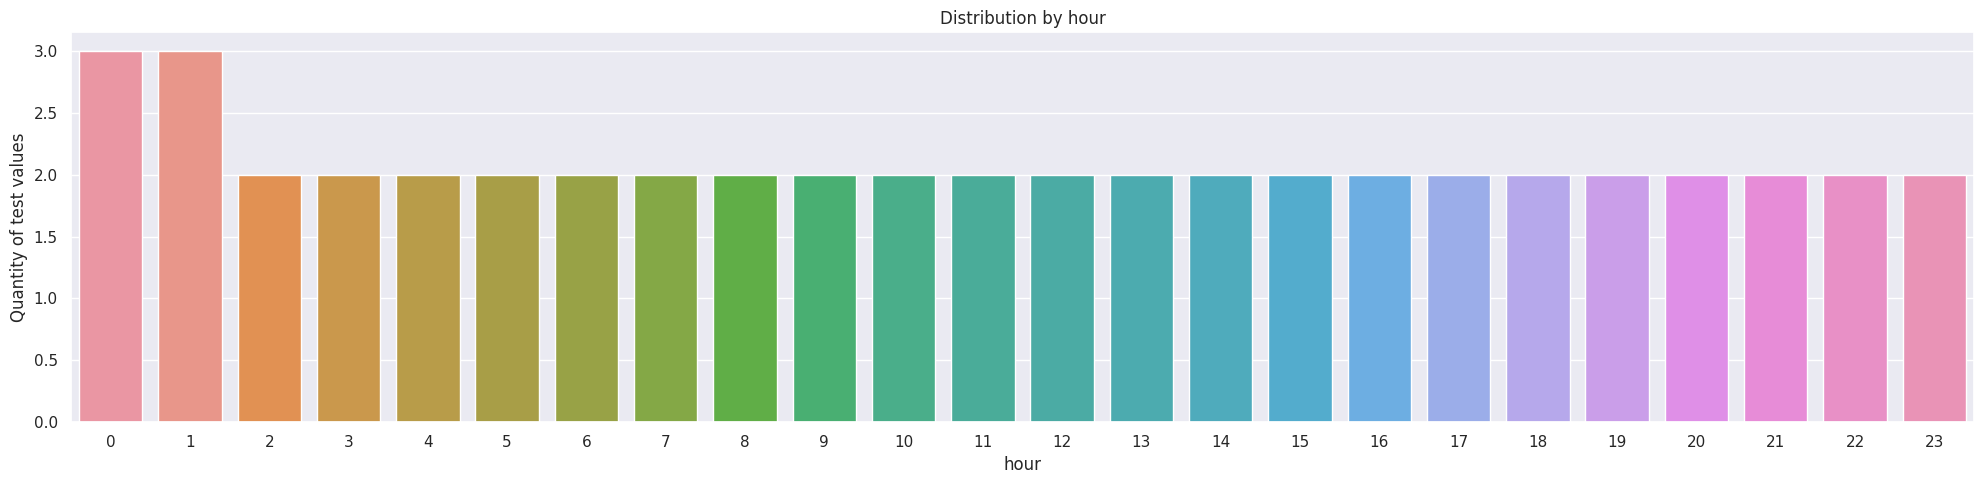

In [5]:
# Set inputs for hour interval.
cptetepl.Test_plots.setUpClass()
srs = cptetepl.Test_plots.get_plot_timeseries_distribution1()
datetime_types = ["hour"]
cplmiplo.plot_timeseries_distribution(srs, datetime_types)

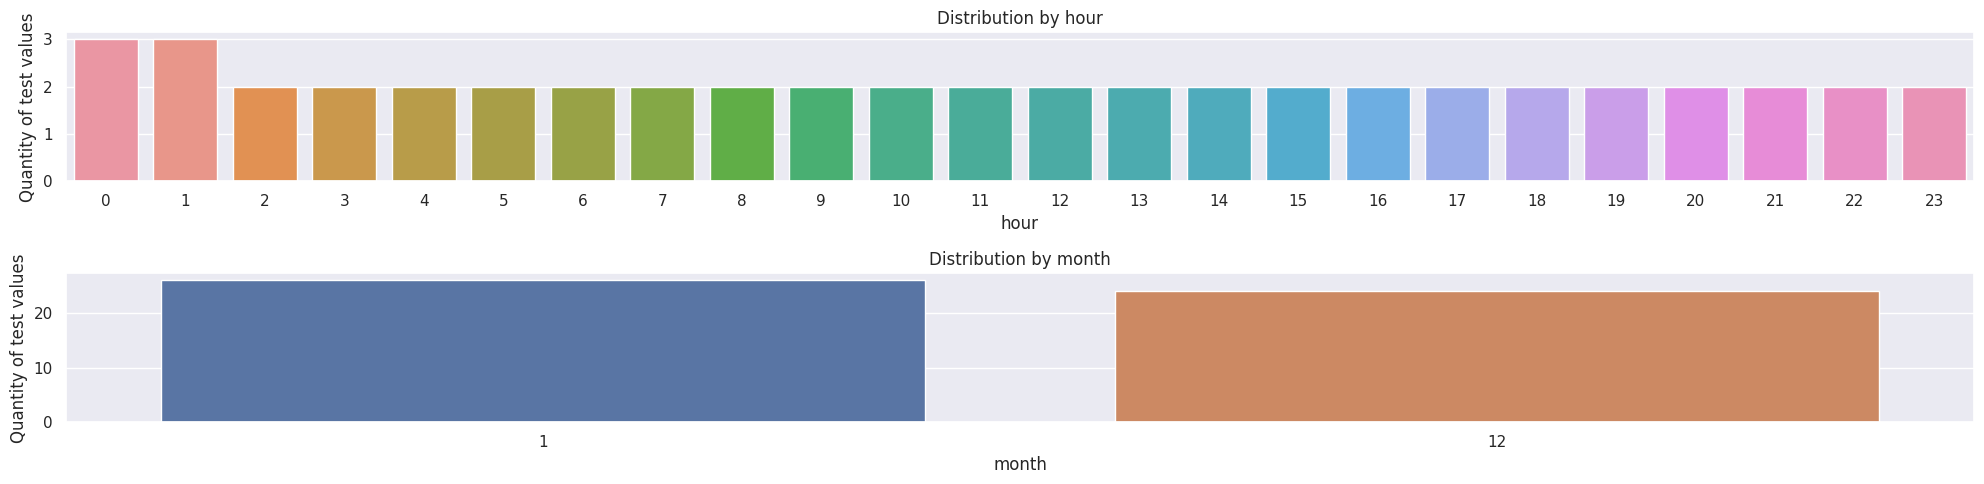

In [6]:
# Set input for hour and month interval.
srs = cptetepl.Test_plots.get_plot_timeseries_distribution1()
datetime_types = ["hour", "month"]
cplmiplo.plot_timeseries_distribution(srs, datetime_types)

## `plot_time_series_by_period()`

In [7]:
# Set inputs.
test_series = cptetepl.Test_plots.get_plot_time_series_by_period1()

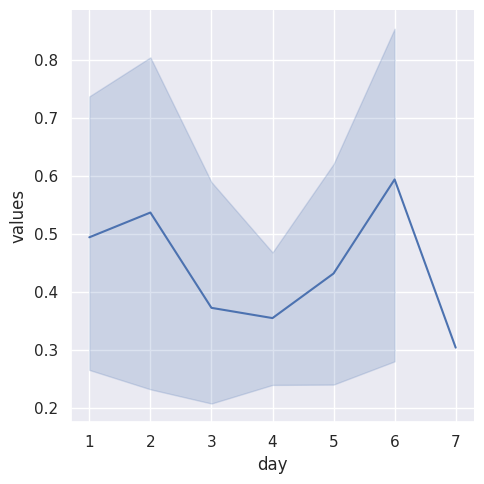

In [8]:
period = "day"
cplmiplo.plot_time_series_by_period(test_series, period)

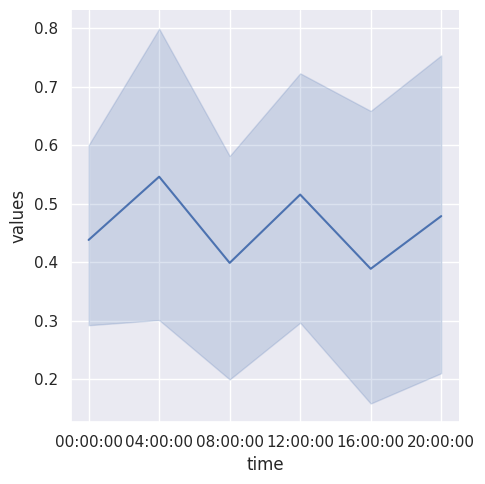

In [9]:
period = "time"
cplmiplo.plot_time_series_by_period(test_series, period)

## `plot_heatmap()`

/venv/lib/python3.8/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


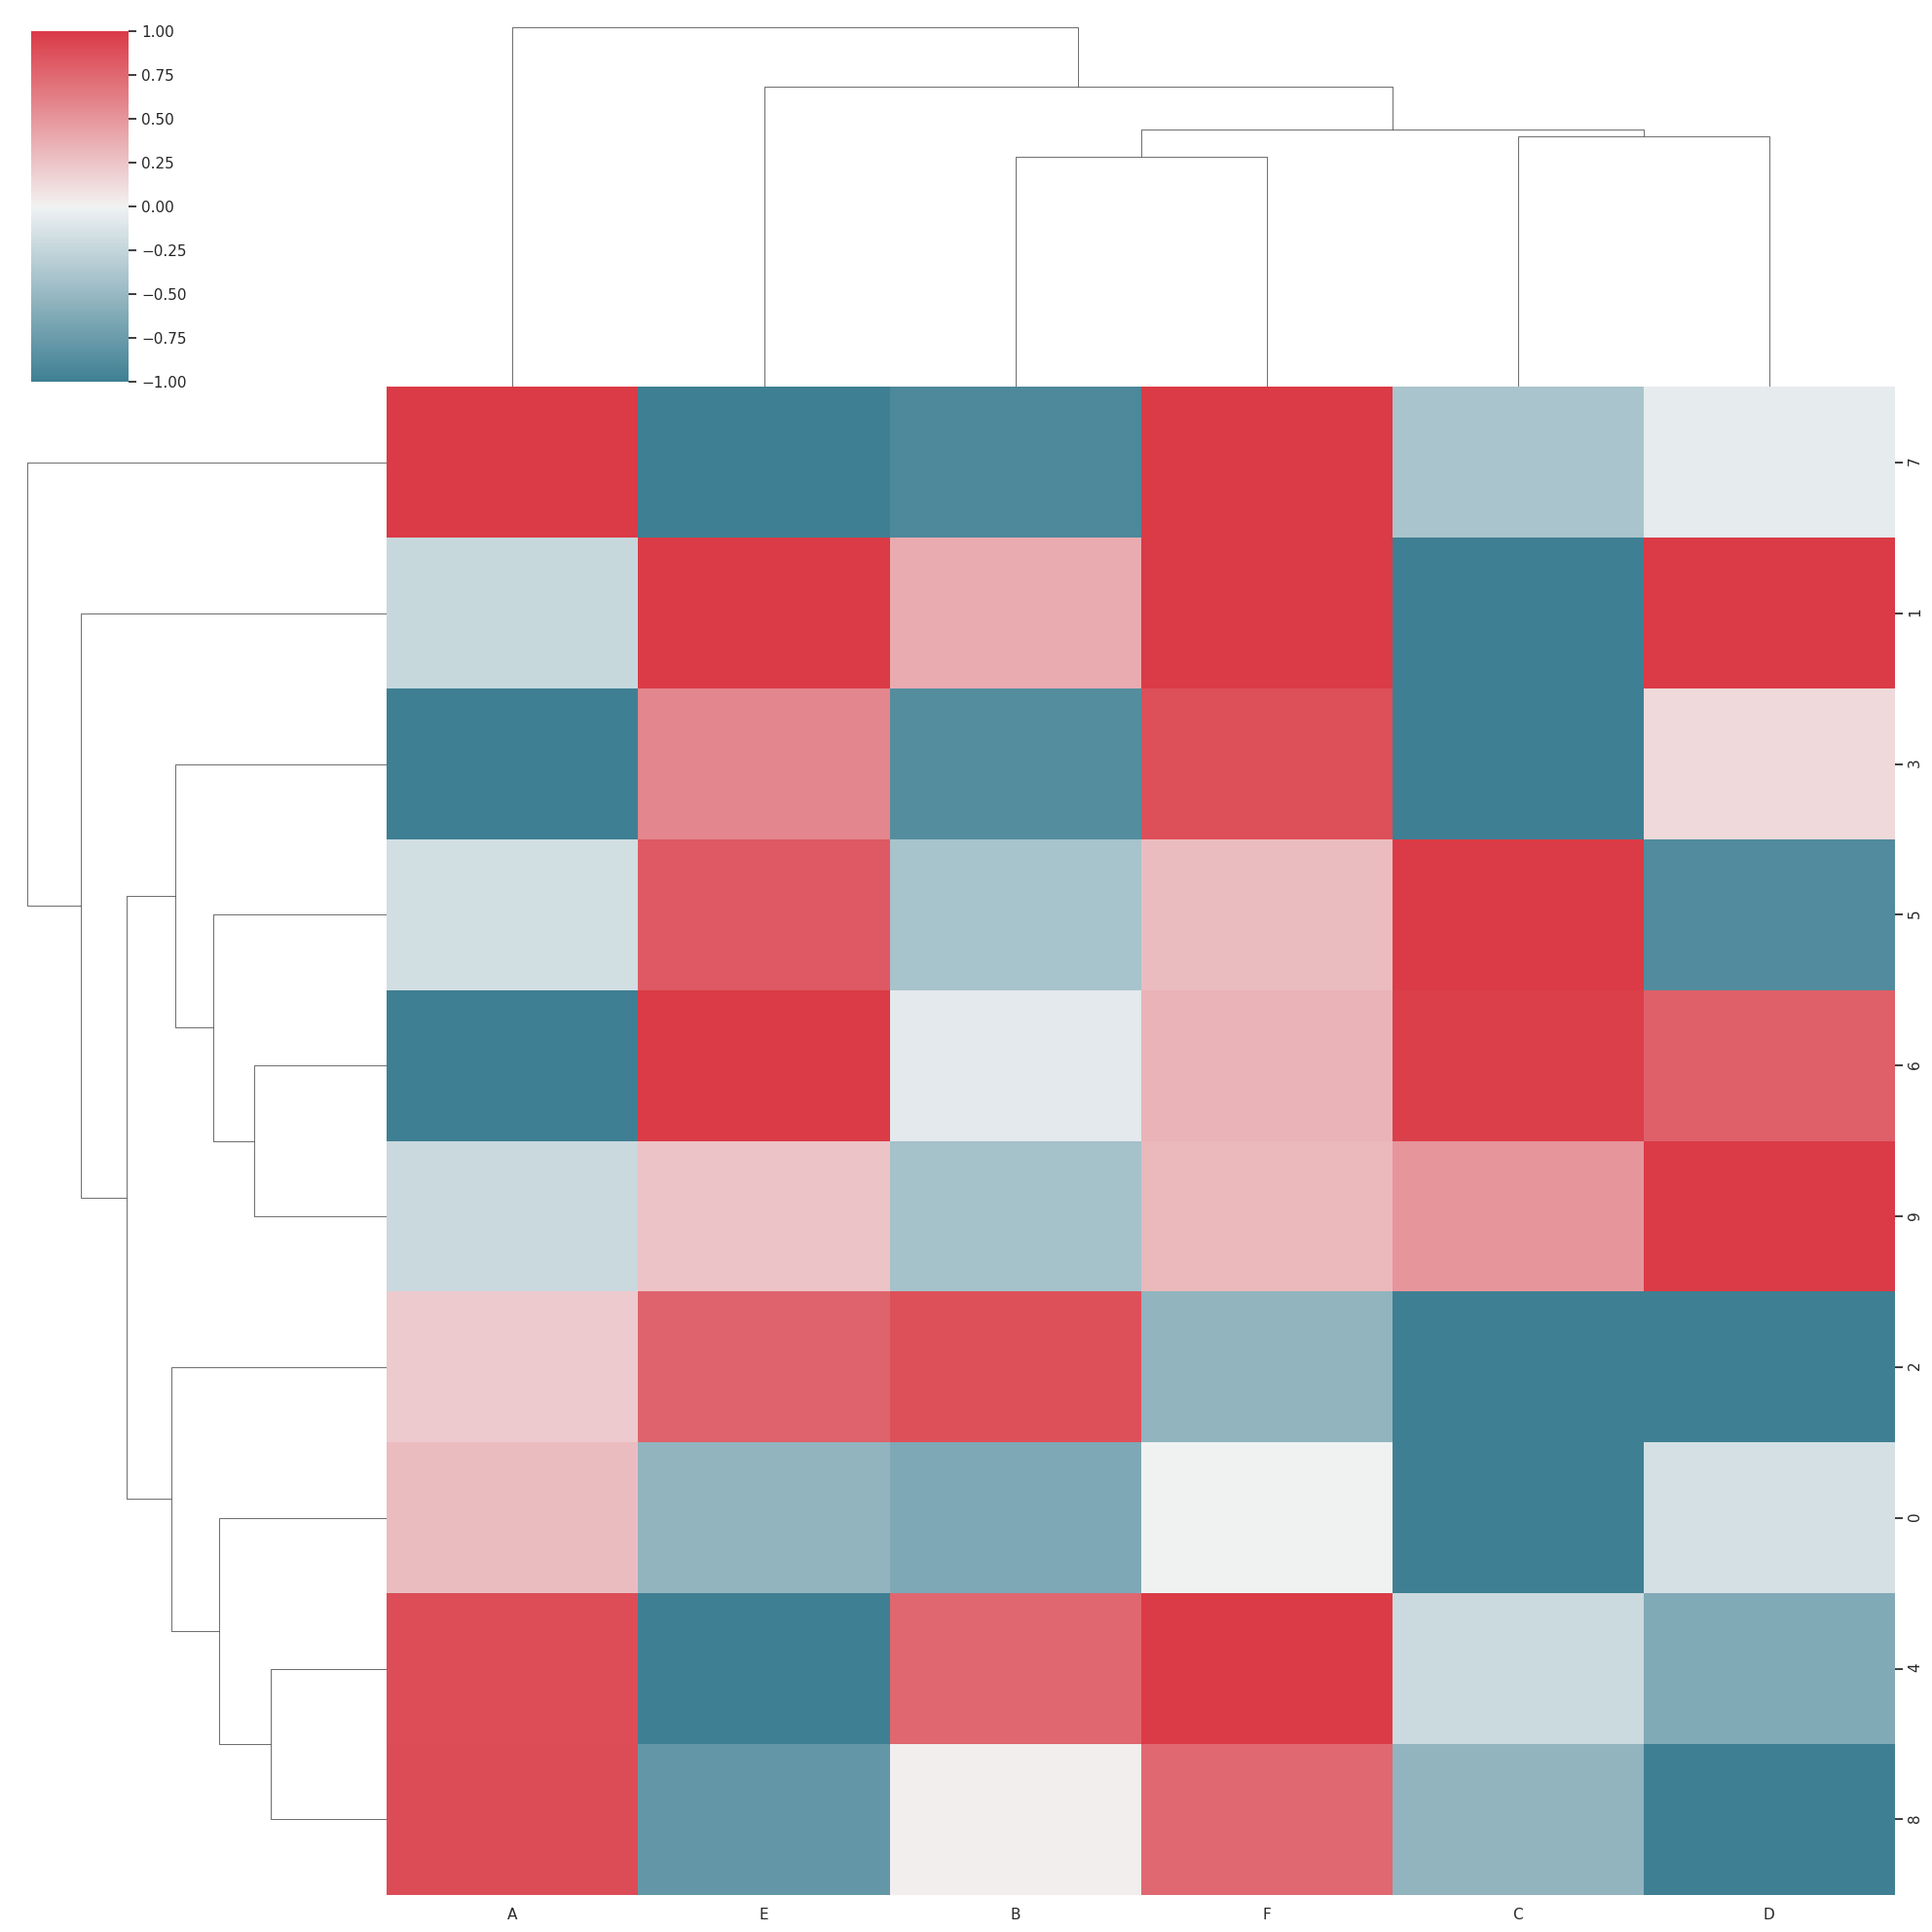

In [10]:
mode = "clustermap"
corr_df = cptetepl.Test_plots.get_plot_heatmap1()
figsize = (20, 20)
cplocorr.plot_heatmap(corr_df, mode, figsize=figsize)

## `plot_rets_signal_analysis()`

Calculating positions:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/8 [00:00<?, ?it/s]

INFO  memory_usage=rss=0.645GB vms=3.125GB mem_pct=17%
INFO  stats=
avg_turnover_(%)           140.416746
turnover_frequency      <BusinessDay>
avg_holding_period           0.712166
holding_period_units    <BusinessDay>
Name: positions, dtype: object
INFO  memory_usage=rss=0.647GB vms=3.126GB mem_pct=17%


/venv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


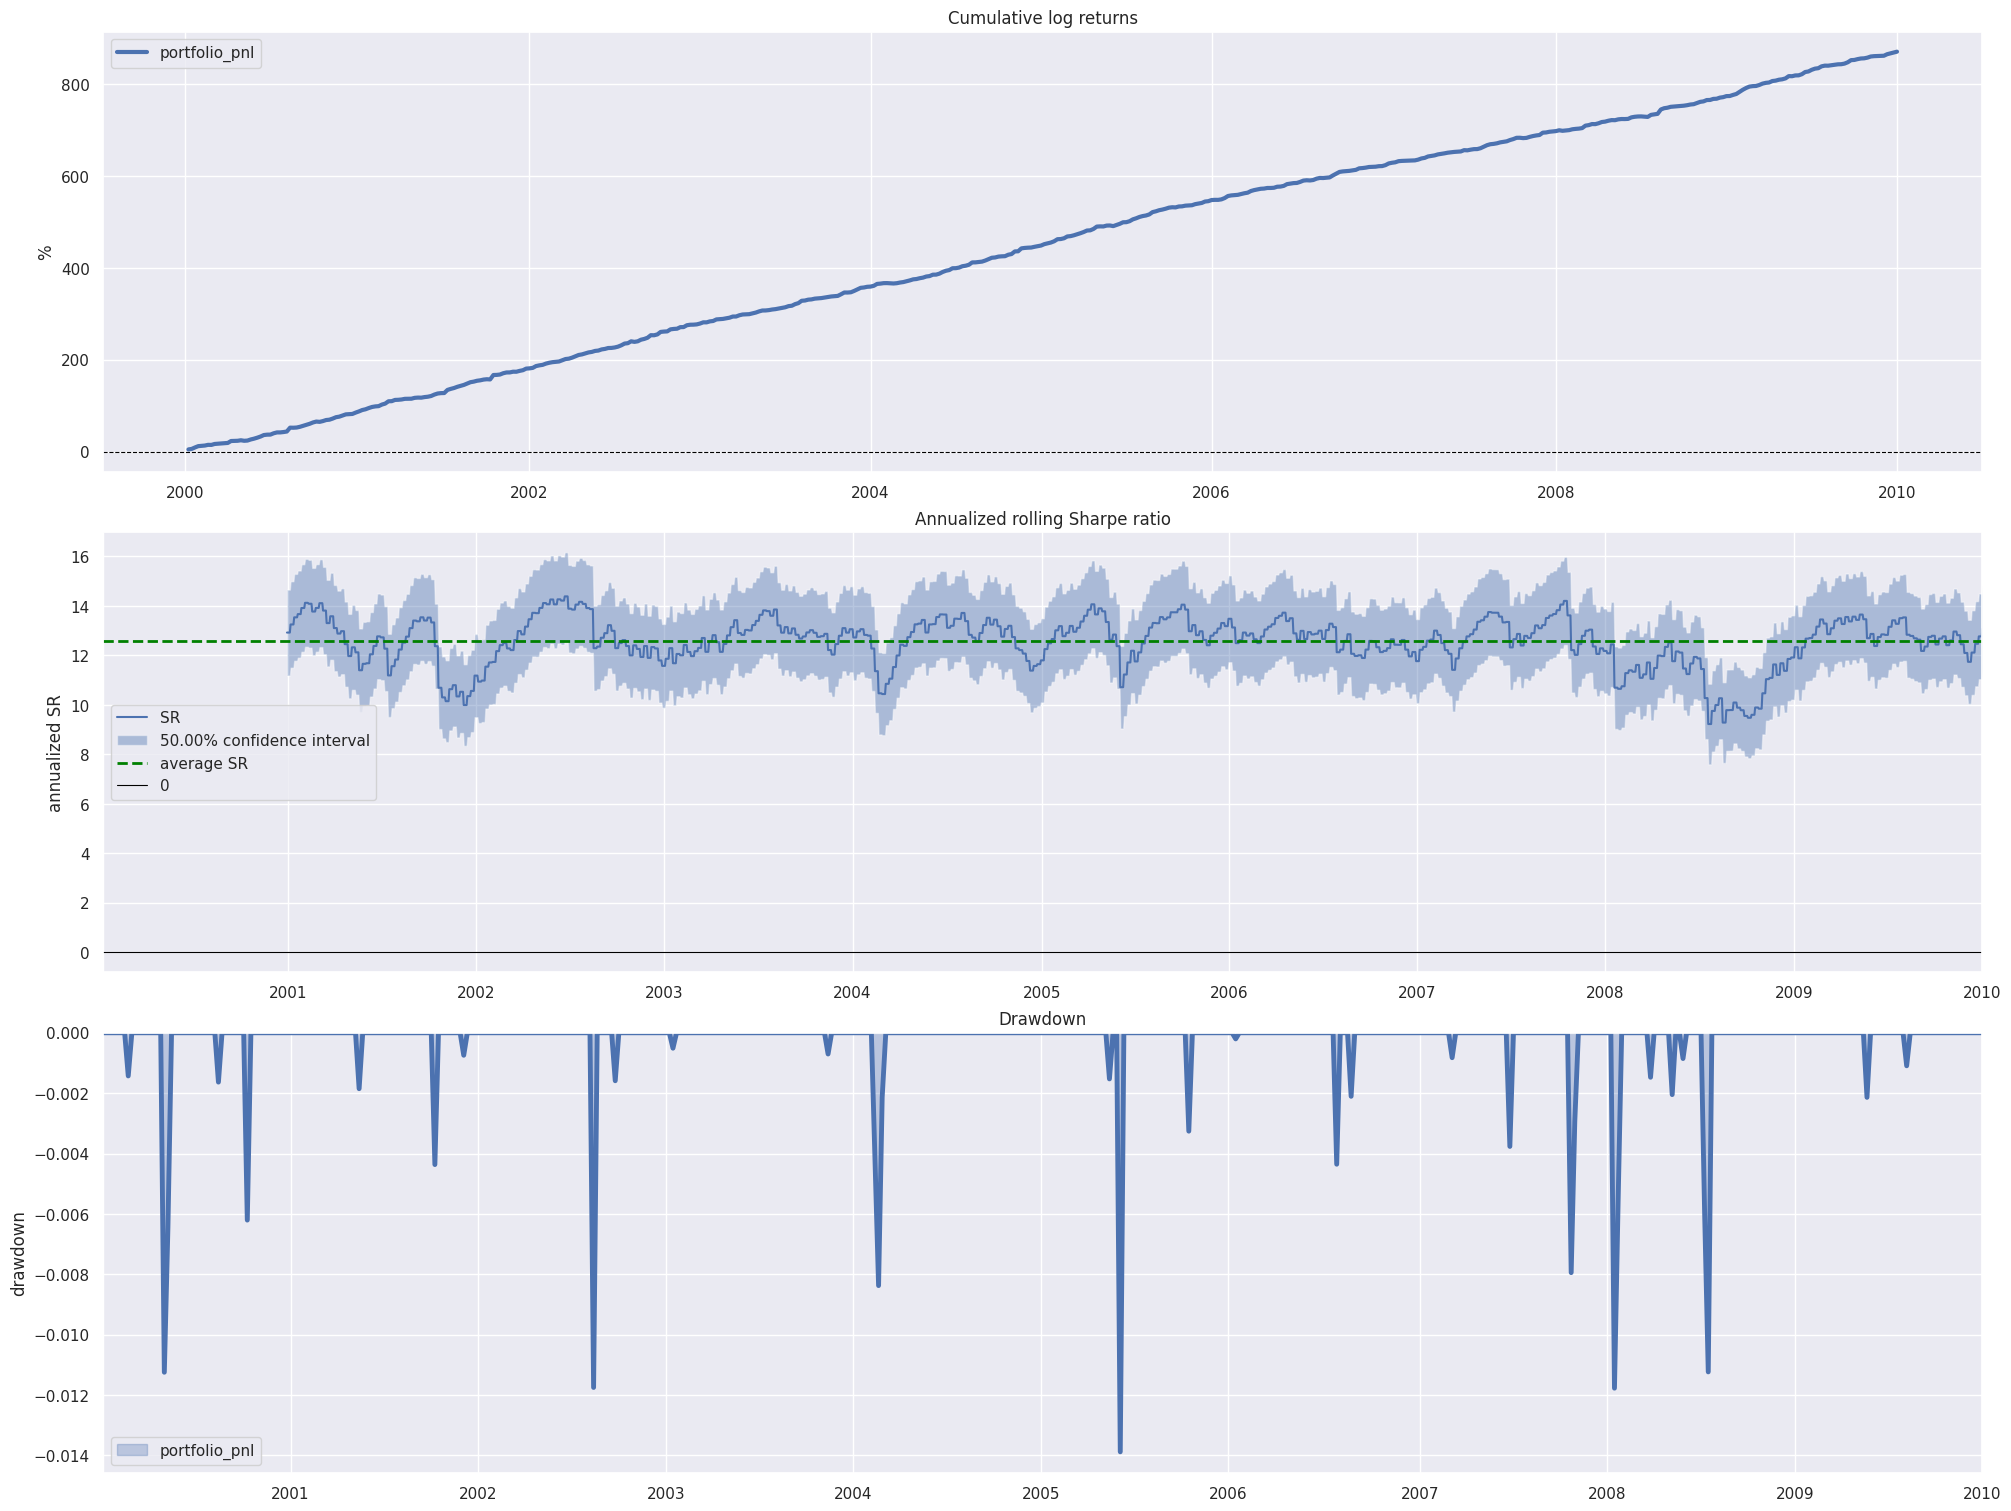

In [11]:
# Set inputs.
evaluator, eval_config = cdmttme.get_example_model_evaluator()
# Build the ModelPlotter.
plotter = dtfmomoplo.ModelPlotter(evaluator)
keys = None
plotter.plot_performance(
    keys=keys,
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
    target_volatility=eval_config["target_volatility"],
)
 

## `plot_effective_correlation_rank()`

In [12]:
# Set inputs.
test_df = cptetepl.Test_plots.get_plot_effective_correlation_rank1()

[3.1172515028026995, 2.7224599952561555, 1.9894766023578112]

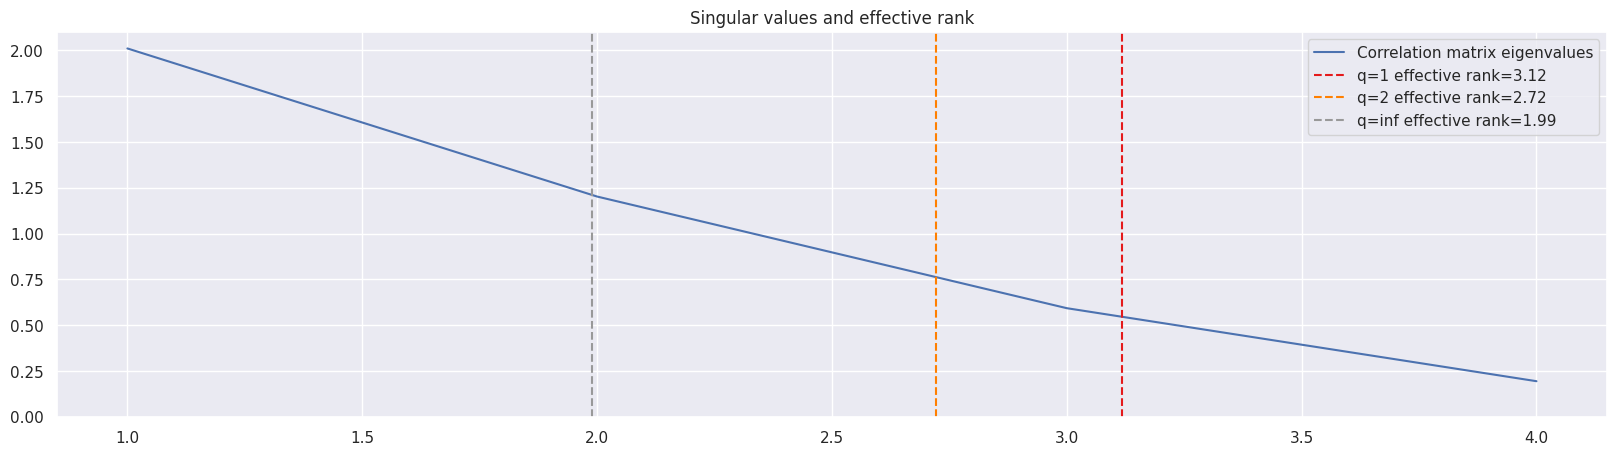

In [13]:
cplocorr.plot_effective_correlation_rank(test_df)

[2.193869717572085,
 2.4992636395455583,
 2.2027520177475006,
 2.3702862445911275,
 2.232576853885804]

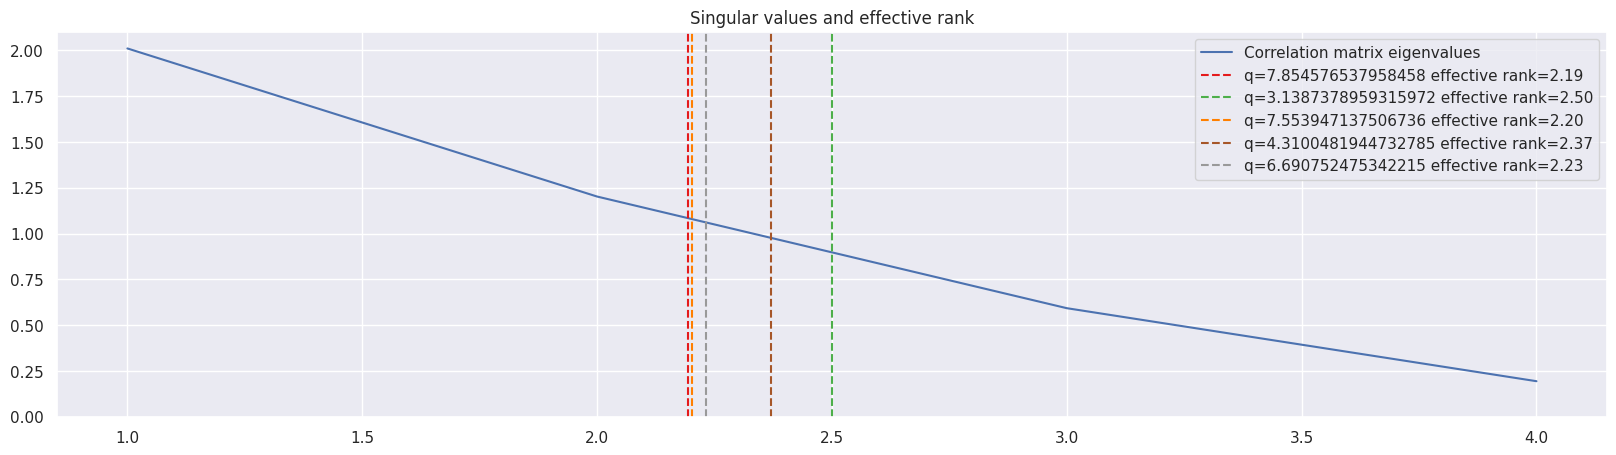

In [14]:
num_q_values = 5 
q_values = np.random.uniform(1, 10, num_q_values).tolist()
cplocorr.plot_effective_correlation_rank(test_df, q_values)

## `plot_spectrum()`

In [15]:
# Set inputs.
test_df = cptetepl.Test_plots.get_plot_spectrum1()

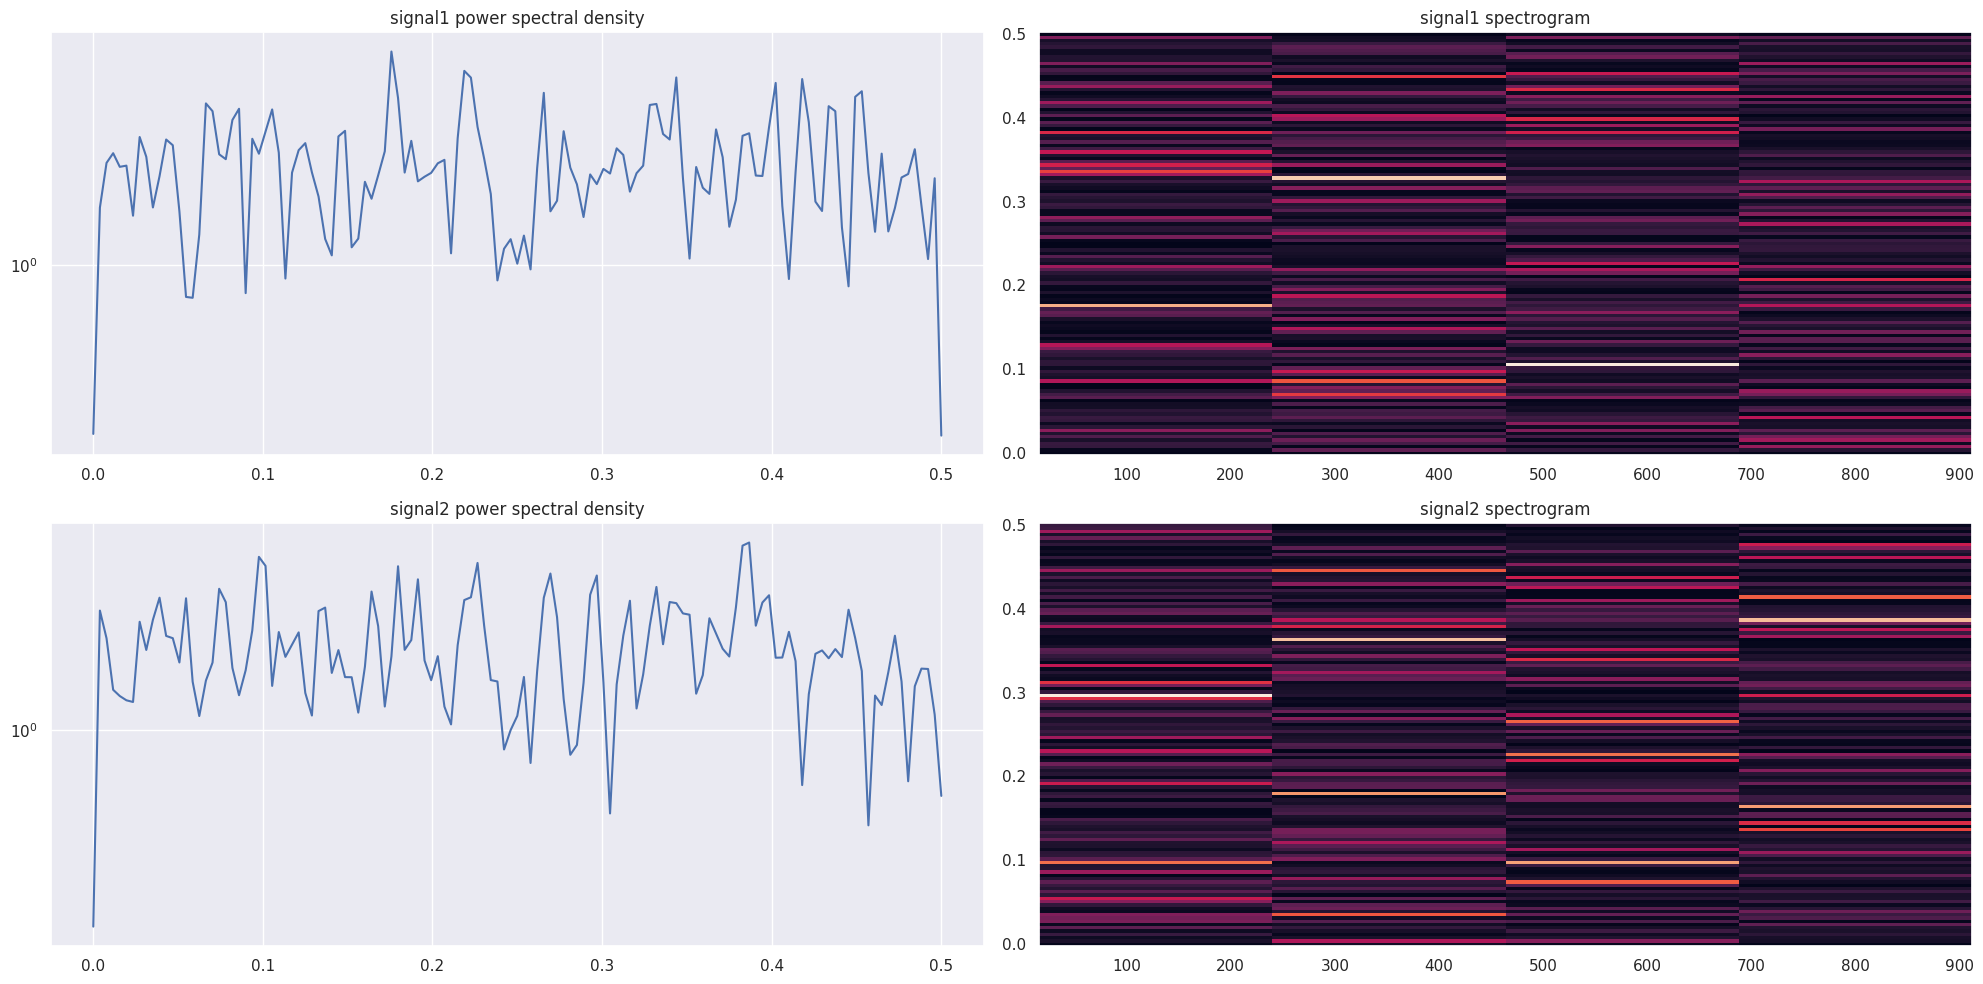

In [16]:
cplmiplo.plot_spectrum(test_df)

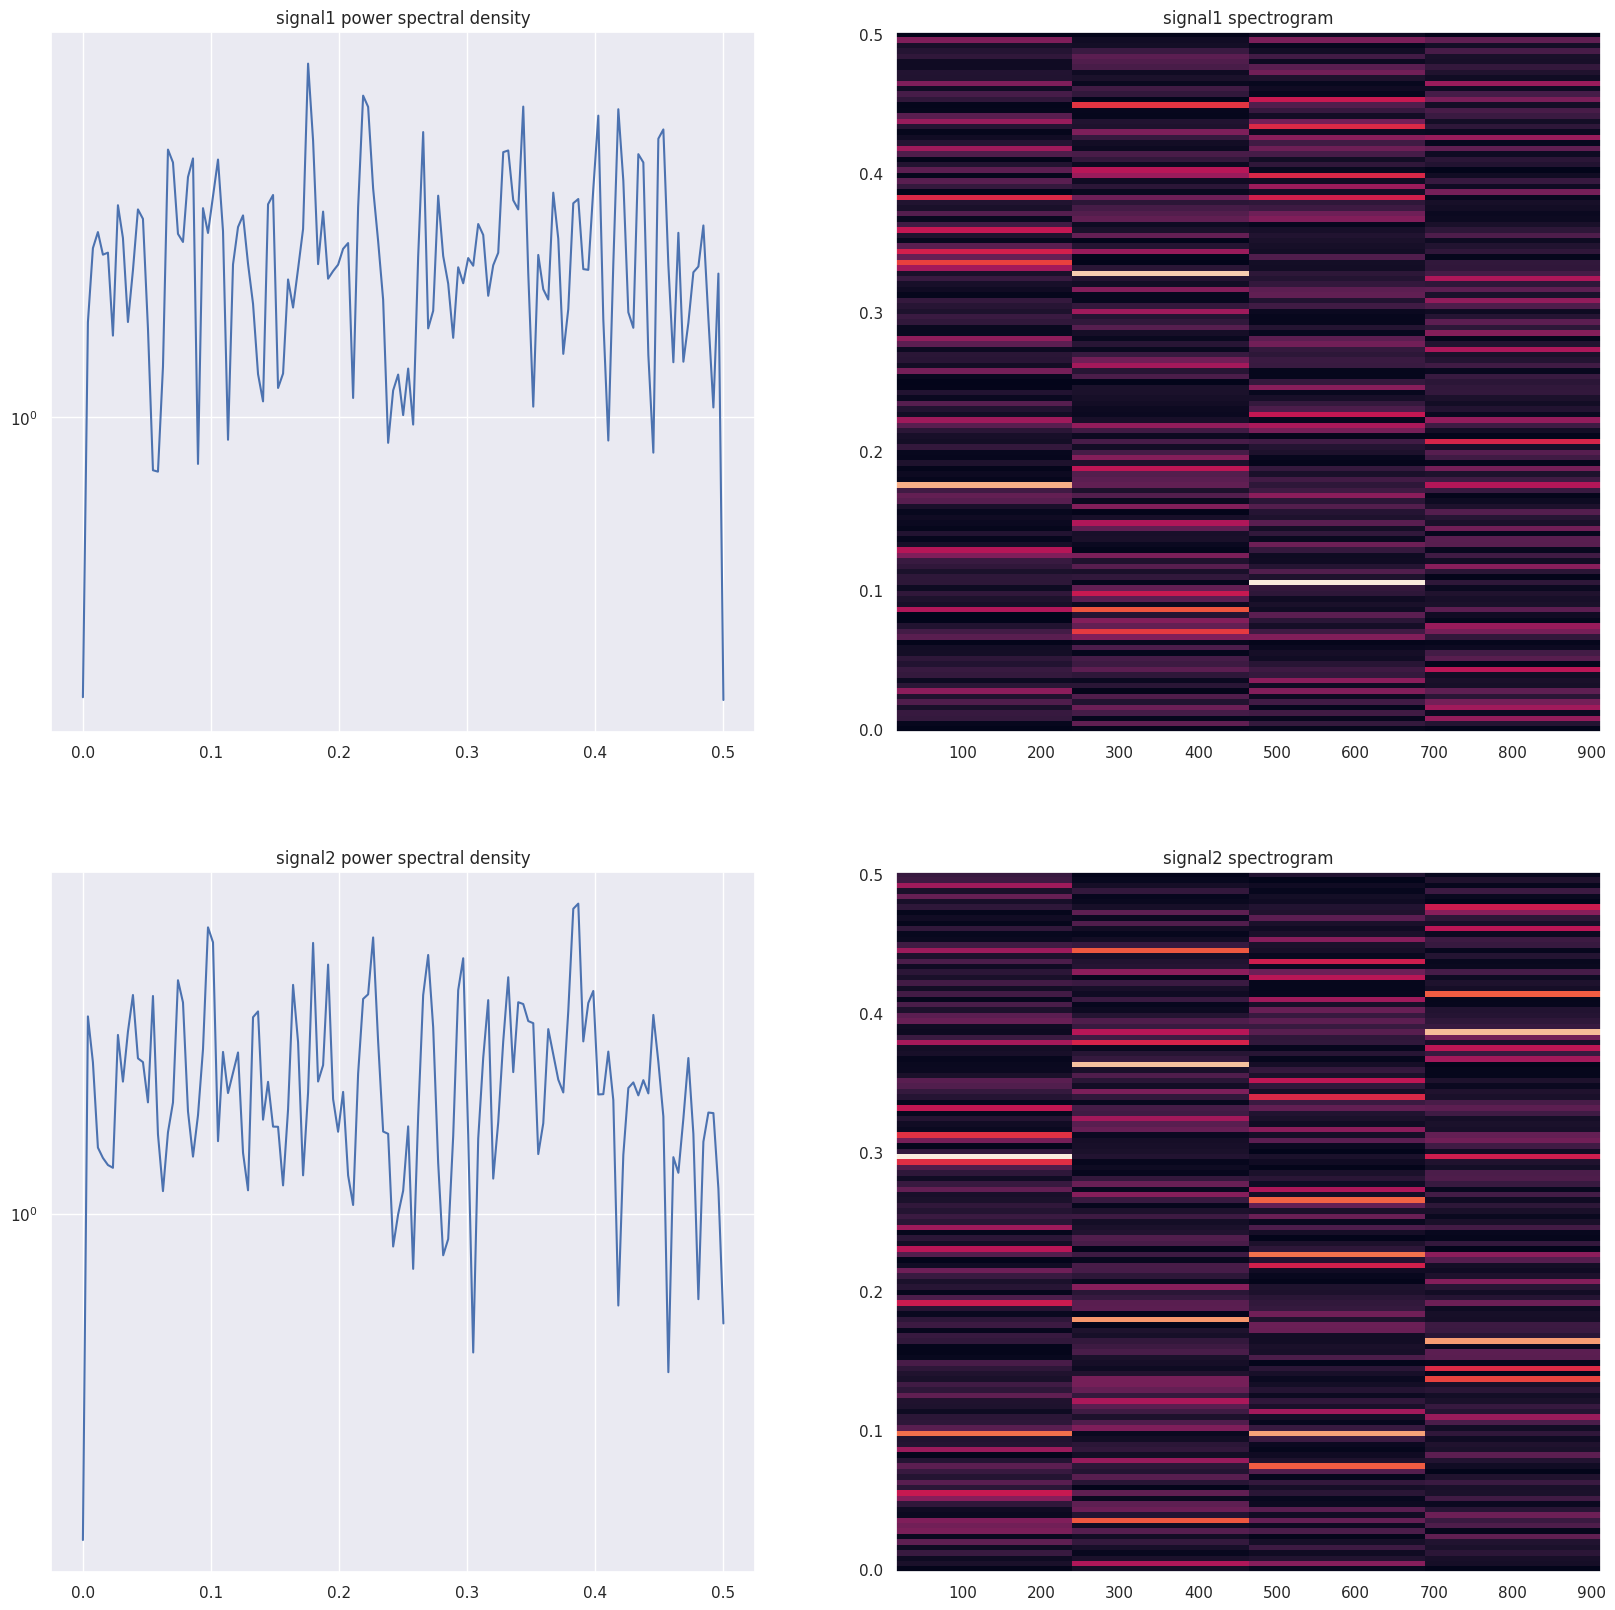

In [17]:
figsize = (20, 20)
_, axes = plt.subplots(2, 2, figsize=figsize)
axes_flat = axes.flatten()
cplmiplo.plot_spectrum(signal=test_df, axes=axes_flat)